# Fandango movie ratings inflation checkup

Back in 2015 the website FiveThirtyEight found that the ratings of the Fandango movie review site were inflated. You can read up a little more [here](https://fivethirtyeight.com/features/fandango-movies-ratings/). There are several online movie rating websites. Some of them have a jury and popular vote. Others have a purely popular vote. But the main claim the article is making is that the ratings are rounded above as a standard. Also, compared to the other websites like Rotten Tomatoes, IMDB and Metacritic, Fandango's ratings are heavily left skewed. Whereas the others are more like a normal distribution.

After the abovementioned article Fandango reacted that they were not aware of the mistakes. They promised to improve the system, of course those improvements take time but at some point we have to be able to checkup. And that is where the ratings of 2016-2017 come in. Let's check if they followed up on their promises!

In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Let's read in and scan our data quickly
fd_before = pd.read_csv("fandango_score_comparison.csv")
fd_after = pd.read_csv("movie_ratings_16_17.csv")
print(fd_before.head())
fd_after.head()

                             FILM  RottenTomatoes  RottenTomatoes_User  \
0  Avengers: Age of Ultron (2015)              74                   86   
1               Cinderella (2015)              85                   80   
2                  Ant-Man (2015)              80                   90   
3          Do You Believe? (2015)              18                   84   
4   Hot Tub Time Machine 2 (2015)              14                   28   

   Metacritic  Metacritic_User  IMDB  Fandango_Stars  Fandango_Ratingvalue  \
0          66              7.1   7.8             5.0                   4.5   
1          67              7.5   7.1             5.0                   4.5   
2          64              8.1   7.8             5.0                   4.5   
3          22              4.7   5.4             5.0                   4.5   
4          29              3.4   5.1             3.5                   3.0   

   RT_norm  RT_user_norm  ...  IMDB_norm  RT_norm_round  RT_user_norm_round  \
0     3

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


In [3]:
#There are lots of columns not relevant. Therefore I will save the most relevant columns to two new variables.
before = fd_before[["FILM","Fandango_Stars", "Fandango_Ratingvalue", "Fandango_votes", "Fandango_Difference"]]
after = fd_after[["movie","year","fandango"]]

### Sample from 2017
It should be noted that for the Fandango ratings in our 'after' file the author of the data only took the 214 most popular movies. Which means we are not dealing with a random sample. If the population of movies is distributed in a normal way, then selecting the most popular movies only will most likely affect the result. Hence one would expect the graph to be skewed to the left.

Another thing we can see quickly about the 'after' data is that it contains only the data of the stars given, therefore it might be difficult to compare the argument of rounding. 

The 'before' data on the other hand does have the difference between stars and actual rating. And more it has generated the sample from all the movies from 2015. Therefore we can say the 'before' sample is more representative.

# A new way

On the other hand we should not let a good web scraping session and some good data go to waste. So we need to tweak our goal a bit. One way to do it is to limit the original sample to only the n most popular movies from 2015. We would still not be able to get the ratings as accurately as the data from 2015. But we would be able to compare the star ratings. Most probably if the rounding function has been repaired, and a 4.1 does not become a 4.5 anymore. Then we would see a lot less 4.5's. This is not the most ideal goal, but it's the best we can see with our data at hand. 

In order to see which movies are popular we will take a look at the ratings. The 2016/17 data calls a popular movie one with "significant amount of ratings". For significant we will take the number 30 as Hickney used for his benchmark in 2015. Then we will be able to compare the data of two separate years, 2015 and 2016. 

In [4]:
#We have to see if all movies in the datasets are from one year only. 
print(before['FILM'].value_counts())
print(after['year'].value_counts())

Straight Outta Compton (2015)            1
Amy (2015)                               1
Me and Earl and The Dying Girl (2015)    1
The Age of Adaline (2015)                1
Birdman (2014)                           1
                                        ..
Monkey Kingdom (2015)                    1
Furious 7 (2015)                         1
Trainwreck (2015)                        1
Mr. Holmes (2015)                        1
Cake (2015)                              1
Name: FILM, Length: 146, dtype: int64
2016    191
2017     23
Name: year, dtype: int64


In [9]:
#As we can see both datasets have films from different years. Let's make that uniform by cleaning the years.

#Extracting the year from the 'FILM' column
before['Year'] = before['FILM'].str[-5:-1].astype(int)

#The code got a useless warning, I got rid of that.
import warnings
warnings.filterwarnings('ignore')

before['Year'].value_counts()

2015    129
2014     17
Name: Year, dtype: int64

In [6]:
#Selecting all movies from 2015 and 2016.
fd2015 = before[before['Year'] == 2015]
fd2016 = after[after['year'] == 2016]

#Let's see what the minimal rating is for the 2015 set.
fd2015['Fandango_votes'].min()

35

In [7]:
fd2015.describe()

,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,Year
count,129.000000,129.000000,129.000000,129.000000,129.0
mean,4.085271,3.846512,3761.891473,0.238760,2015.0
std,0.538096,0.505446,6543.601748,0.152741,0.0
min,3.000000,2.700000,35.000000,0.000000,2015.0
25%,3.500000,3.500000,210.000000,0.100000,2015.0
50%,4.000000,3.900000,1415.000000,0.200000,2015.0
75%,4.500000,4.200000,4045.000000,0.400000,2015.0
max,5.000000,4.800000,34846.000000,0.500000,2015.0


In [8]:
fd2016.describe()

,year,fandango
count,191.0,191.000000
mean,2016.0,3.887435
std,0.0,0.509540
min,2016.0,2.500000
25%,2016.0,3.500000
50%,2016.0,4.000000
75%,2016.0,4.250000
max,2016.0,5.000000


### Ratings 2016
As we can see above our 2016 dataset contains more films than the one from 2015. This could be because there has been another rating definition of popular. Moreover it will be difficult to check whether those ratings are not there anymore, because at the time of writing it is 2020 and the movies' ratings must have changed. Despite that, it is still the best thing we've got. 
Hence we will take a random sample from our data and double check that with the fandango website. 

If at least 90% of fd2016 has a rating of 30 votes or more we can be sure that most of the data is representative. As we can see above, the 2015 data has a minimum of 35 votes, so they are all over. 

After checking and sampling, which I removed, I found out in June 2020 that the Fandango website has removed the vote system and it has become a different website altogether, selling tickets and they are using the Rotten Tomatoes system now. There is no way to check upon the old votes. 

This means that for the Guided Project we will have to trust on what the solutions found in 2018. And that result was only one film in the sample that did not have more than 30 votes. Therefore the answers have found it to be representative, and I will have to trust that then. This means that it's **time for analysis**.

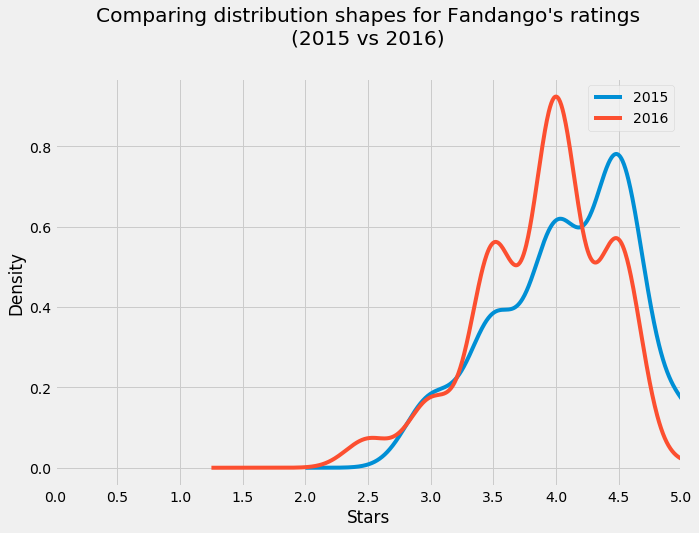

In [18]:
## Let's create a kernel density plot for the ratings of both years. 
%matplotlib inline
plt.style.use('fivethirtyeight')
xticklabels = [0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]

fd2015['Fandango_Stars'].plot.kde(label='2015', legend=True, figsize = (10,7))
fd2016['fandango'].plot.kde(label='2016', legend=True)

plt.title("Comparing distribution shapes for Fandango's ratings\n(2015 vs 2016)",
          y = 1.07) # the `y` parameter pads the title upward
plt.xlabel('Stars')
plt.xlim(0,5) # because ratings start at 0 and end at 5
plt.xticks(ticks = xticklabels)
plt.show()

## Comparing the distributions

* We can see that both distributions are left skewed. 
* Still, we do see that the 2016 data resembles a normal distribution a little more than the 2015 data.
* There is some evidence to say that the ratings have been corrected. The peak for example is not at 4.5 but at 4 now. 
* This seems to be the case for all values, they have gone half a star to the left. 

In [28]:
#Now we will examine the slight difference on a more granular level.
print(fd2015['Fandango_Stars'].value_counts(normalize=True).sort_index() * 100)
print(fd2016['fandango'].value_counts(normalize=True).sort_index() * 100)

3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64
2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64


## Clear difference
We can see that the ratings have shifted a lot towards the lower end e.g. 
* 5 stars dropped from 7% to 0.5%. 
* 4.5 stars went from 38% to 25%.
* 4 stars went up from 28.5% to 40%.

In the end it is not clear if the mean has changed, hence the direction of change is not that clear anymore. Let's look at those metrics a little more closely.

In [30]:
#The means of 2015 and 2016
print(fd2015['Fandango_Stars'].mean())
fd2016['fandango'].mean()

4.0852713178294575


3.887434554973822

In [31]:
#The Medians of 2015 and 2016
print(fd2015['Fandango_Stars'].median())
fd2016['fandango'].median()

4.0


4.0

In [32]:
#The Modes of 2015 and 2016
print(fd2015['Fandango_Stars'].mode())
fd2016['fandango'].mode()

0    4.5
dtype: float64


0    4.0
dtype: float64

In [34]:
# Let's make those values a little more clear.
summary = pd.DataFrame()
summary['2015']=[4.0852713178294575,4.0,4.5]
summary['2016']=[3.887434554973822,4.0,4.0]
summary.index = ['mean','median','mode']
summary

,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


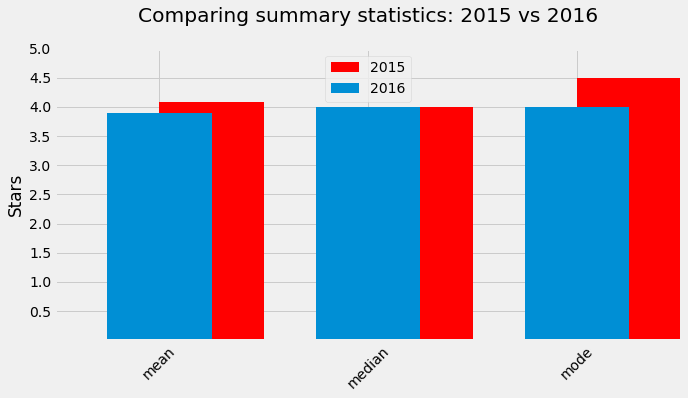

In [54]:
# Now we can visualize them to make it even more clear. 
from numpy import arange

summary['2015'].plot.bar(color='red', align='edge', figsize = (10,5))
summary['2016'].plot.bar()

plt.ylabel('Stars')
plt.yticks(arange(.5,5.1,.5))
plt.legend(loc ='upper center')
plt.title('Comparing summary statistics: 2015 vs 2016', y = 1.07)
plt.xticks(rotation=45)
plt.show()

### Direction
The difference in direction is clear, especially because the mode has changed from 4.5 to 4.0. But also the mean has dropped 4%

# Conclusion
From the data we have worked with there is a clear answer to our question above. The direction of the data has been changed slightly from the 'skewed' most popular movies in 2015 to the more corrected popular movies of 2016. Most likely the ratings have been fixed. The only other explanation could be that the movies of 2016 were just a lot worse, but that seems unreasonable to assume. 

One could assume that these changes were due to Hickey's report in 2015.